In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Training data set
train_d = pd.read_csv("C:\\Users\\Saiftalk Server\\Desktop\\codsoft\\Genre Classification Dataset\\train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_d.head(10))

C:\Users\Saiftalk Server\AppData\Local\Temp\ipykernel_11884\2035144248.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_d = pd.read_csv("C:\\Users\\Saiftalk Server\\Desktop\\codsoft\\Genre Classification Dataset\\train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [3]:
#Testing dataset
test_d = pd.read_csv("C:\\Users\\Saiftalk Server\\Desktop\\codsoft\\Genre Classification Dataset\\test_data.txt",sep=':::', names=['ID', 'TITLE', 'DESCRIPTION', 'GENRE'])
display(test_d.head(10))

C:\Users\Saiftalk Server\AppData\Local\Temp\ipykernel_11884\507380323.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_d = pd.read_csv("C:\\Users\\Saiftalk Server\\Desktop\\codsoft\\Genre Classification Dataset\\test_data.txt",sep=':::', names=['ID', 'TITLE', 'DESCRIPTION', 'GENRE'])


,ID,TITLE,DESCRIPTION,GENRE
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,NaN
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...,NaN
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,NaN
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,NaN
9,10,Press (2011),Press is a story of young people overwhelmed ...,NaN


In [4]:
#Solution for the Test
test_d_s =  pd.read_csv("C:\\Users\\Saiftalk Server\\Desktop\\codsoft\\Genre Classification Dataset\\test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(test_d_s.head(10))

C:\Users\Saiftalk Server\AppData\Local\Temp\ipykernel_11884\3386654696.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_d_s =  pd.read_csv("C:\\Users\\Saiftalk Server\\Desktop\\codsoft\\Genre Classification Dataset\\test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
5,6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...
6,7,L'amica (1969),drama,The beautiful but neglected wife of a brillia...
7,8,Ina Mina Dika (1989),comedy,Vasu Inamdar (Ina) suffers from a disorder wh...
8,9,Equinox Special: Britain's Tornados (2005),documentary,An insight into the tornados that hit Kensal ...
9,10,Press (2011),drama,Press is a story of young people overwhelmed ...


In [35]:
#Checking for the top most genres 
count_genres = train_d['GENRE'].value_counts().head()
print(count_genres)

genres = train_d['GENRE'].value_counts().head().index
print(genres)

all_genre = train_d['GENRE'].value_counts().index

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
Name: count, dtype: int64
Index([' drama ', ' documentary ', ' comedy ', ' short ', ' horror '], dtype='object', name='GENRE')


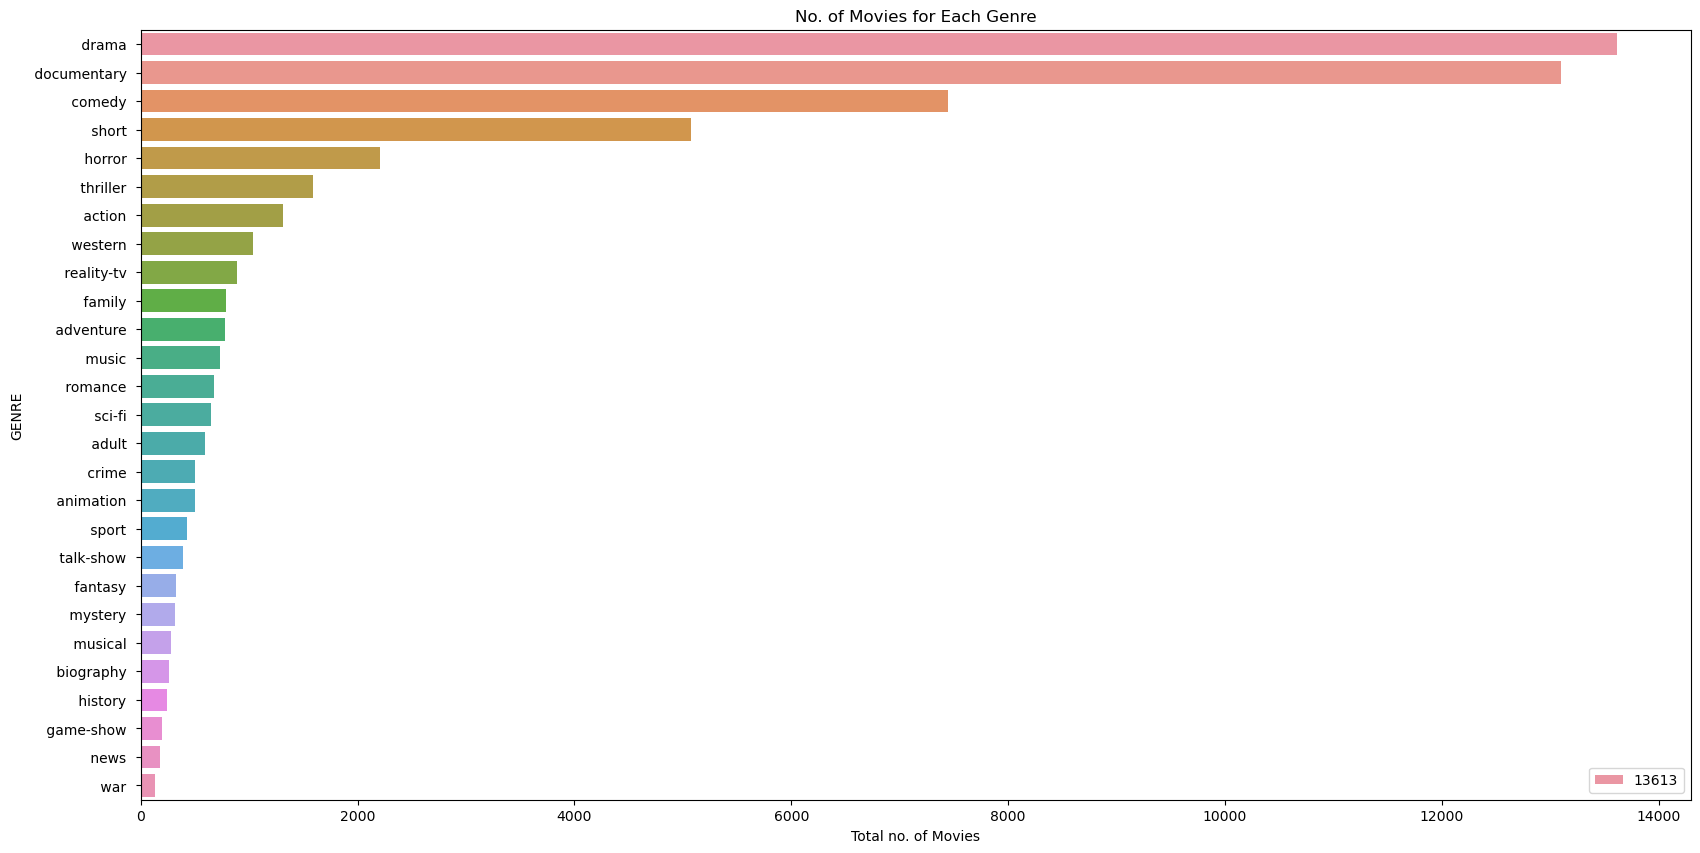

In [36]:
#Plotiing the Bar for all the genres, to check the popularity of the individual genres
plt.figure(figsize=(20,10))
sns.countplot(y=train_d['GENRE'], order = all_genre)
plt.title('No. of Movies for Each Genre')
plt.xlabel('Total no. of Movies')
plt.ylabel('GENRE')
plt.legend(count_genres)
plt.show()

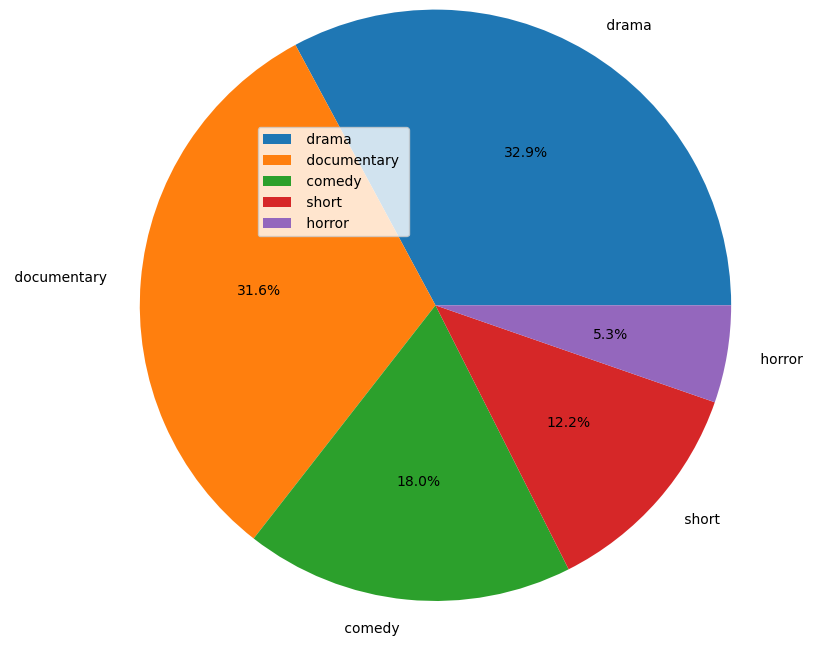

In [11]:
#Using a pie chart , marking the top 5 genres
plt.pie(count_genres, labels = genres, autopct = '%0.1f%%', radius = 2)
plt.legend(loc = 'upper left')
plt.show()

In [12]:
#Checkinh for potential null values in the description
print(train_d['DESCRIPTION'].isnull().sum())
print(test_d['DESCRIPTION'].isnull().sum())

0
0


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [14]:
#Transforming the textual description into numerical format
tfid = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = tfid.fit_transform(train_d['DESCRIPTION'])
X_test = tfid.transform(test_d['DESCRIPTION'])

#Transforming the genres into numerical format 
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_d['GENRE'])
y_test = label_encoder.transform(test_d_s['GENRE'])

In [15]:
#Training the Dataset 
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

clf = LinearSVC()
clf.fit(X_train_, y_train_)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5787273286197356
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.30      0.37       398
           1       0.68      0.42      0.52       156
           2       0.43      0.20      0.27       220
           3       0.37      0.14      0.20       146
           4       0.00      0.00      0.00        88
           5       0.53      0.59      0.56      2215
           6       0.28      0.05      0.08       164
           7       0.68      0.81      0.74      3942
           8       0.56      0.72      0.63      4076
           9       0.34      0.15      0.21       218
          10       0.20      0.05      0.08       103
          11       0.82      0.65      0.73        55
          12       0.20      0.01      0.03        73
          13       0.63      0.65      0.64       626
          14       0.65      0.54      0.59       217
          15       0.25      0.04      0.07        77
      

In [30]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.5766051660516606
Test Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.31      0.35      1314
           1       0.63      0.38      0.47       590
           2       0.49      0.23      0.31       775
           3       0.41      0.12      0.19       498
           4       0.14      0.00      0.01       264
           5       0.53      0.58      0.55      7446
           6       0.33      0.06      0.11       505
           7       0.68      0.83      0.75     13096
           8       0.56      0.71      0.62     13612
           9       0.39      0.14      0.21       783
          10       0.21      0.04      0.07       322
          11       0.80      0.64      0.71       193
          12       0.22      0.02      0.03       243
          13       0.60      0.62      0.61      2204
          14       0.62      0.50      0.56       731
          15       0.43      0.07      0.12       276
          16      

In [16]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [17]:
Mnb_classifier.predict(X_test)

array([8, 8, 7, ..., 8, 8, 7])

In [18]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [31]:
lr_classifier.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.5766051660516606


In [32]:
#Defining a function which takes description as an input and returns the genre of the movie
def Movie_genre(description):
    t_v1 = tfid.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

test1 = "A movie where police cashes the criminal and shoot him"
print(Movie_genre(test1))

test2 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(Movie_genre(test2))



 action 
 drama 
